In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\fortune\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pharma_data = pd.read_csv('Training_set_advc.csv')

In [3]:
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,3233,2,2491,Dx3 dx4,33,20.825297,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1
25075,31394,21,2806,DX2,60,22.679810,YES,RURAL,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0
25076,28315,18,11733,DX4 DX5,51,19.952023,YES,RURAL,Stable,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
25077,1338,4,8577,dx5,21,20.681303,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [4]:
pharma_data.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

In [5]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1356
B                            1356
C                            1356
D                            1356
E                            1356
F                            1356
Z                            1356
Number_of_prev_cond          1356
Survived_1_year                 0
dtype: int64

## Data Cleaning

### Filling missing categorical data with node

In [6]:
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].fillna(pharma_data['Treated_with_drugs'].mode()[0])

### Filling missing numeric data with median

In [7]:
cols = ['A','B','C','D','E','F','Z']  #imputing with median since it is categorical
for i in cols:
    pharma_data[i] = pharma_data[i].fillna(pharma_data[i].median())

### Updating 'Number_of_prev_cond' column whilst correctly retaining its proportion

In [8]:
pharma_data['Number_of_prev_cond'] = (pharma_data['A']+pharma_data['B']+pharma_data['C']+pharma_data['D']+pharma_data['E']+pharma_data['F']+pharma_data['Z'])

In [9]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

### Cleaning 'Treated_with_drugs' column

In [10]:
pharma_data['Treated_with_drugs'].unique()

array(['DX2', 'DX6', 'Dx6', 'dx6 ', 'dx1', 'dx1 dx3 dx4 ', 'DX5 ', 'dx2 ',
       'dx6', 'DX2 DX5 ', 'DX6 ', 'DX1', 'DX3 DX5', 'DX1 DX3', 'DX3 DX4 ',
       'Dx3', 'DX2 DX3', 'DX1 ', 'DX3', 'dx4', 'Dx2', 'Dx1', 'dx1 ',
       'DX1 DX2 DX3 DX5', 'Dx1 dx3', 'Dx5', 'DX2 ', 'DX4 ', 'DX4', 'dx3 ',
       'DX3 DX4 DX5 ', 'DX1 DX3 ', 'DX2 DX5', 'dx3', 'DX1 DX5', 'DX2 DX4',
       'dx2 dx3 ', 'dx2', 'DX3 DX5 ', 'DX5', 'DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX3 ', 'DX1 DX5 ', 'dx5', 'Dx4', 'DX1 DX3 DX5', 'DX1 DX4 ',
       'DX4 DX5', 'dx4 dx5', 'DX1 DX2 ', 'DX1 DX3 DX5 ', 'dx1 dx4',
       'dx4 dx5 ', 'Dx1 dx4 ', 'Dx1 dx2 dx4 dx5 ', 'DX1 DX2', 'Dx4 dx5',
       'DX1 DX3 DX4', 'DX1 DX2 DX3', 'Dx1 dx2', 'DX1 DX4 DX5 ',
       'Dx1 dx2 ', 'DX1 DX4', 'dx2 dx5', 'dx3 dx4', 'DX3 DX4', 'dx2 dx4',
       'Dx2 ', 'DX3 DX4 DX5', 'Dx5 ', 'Dx1 dx3 ', 'dx3 dx5', 'Dx6 ',
       'DX1 DX3 DX4 ', 'DX1 DX2 DX4', 'dx5 ', 'DX2 DX4 ', 'DX1 DX4 DX5',
       'Dx1 dx2 dx3 dx5', 'dx1 dx3 dx5 ', 'Dx2 dx5', 'dx2 dx3 dx4 ',


In [11]:
len(pharma_data['Treated_with_drugs'].unique())

182

In [12]:
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].str.upper().str.strip()
pharma_data['Treated_with_drugs'].unique()

array(['DX2', 'DX6', 'DX1', 'DX1 DX3 DX4', 'DX5', 'DX2 DX5', 'DX3 DX5',
       'DX1 DX3', 'DX3 DX4', 'DX3', 'DX2 DX3', 'DX4', 'DX1 DX2 DX3 DX5',
       'DX3 DX4 DX5', 'DX1 DX5', 'DX2 DX4', 'DX2 DX3 DX4', 'DX4 DX5',
       'DX1 DX3 DX5', 'DX1 DX4', 'DX1 DX2', 'DX1 DX2 DX4 DX5',
       'DX1 DX2 DX3', 'DX1 DX4 DX5', 'DX1 DX2 DX4', 'DX1 DX2 DX5',
       'DX2 DX4 DX5', 'DX2 DX3 DX5', 'DX1 DX2 DX3 DX4', 'DX1 DX3 DX4 DX5',
       'DX2 DX3 DX4 DX5', 'DX1 DX2 DX3 DX4 DX5'], dtype=object)

In [13]:
len(pharma_data['Treated_with_drugs'].unique())

32

### Looking deeper inside to find possible data issues

In [14]:
for i in pharma_data:
    print(pharma_data[i].value_counts())

16036    2
13256    2
5882     2
7931     2
8119     2
        ..
29588    1
25494    1
27543    1
7065     1
32768    1
Name: ID_Patient_Care_Situation, Length: 23097, dtype: int64
11    532
49    524
8     522
6     516
7     516
1     514
4     511
29    506
51    505
34    505
52    504
43    503
12    503
35    503
46    502
15    501
30    500
17    499
19    498
45    497
36    494
13    494
40    484
21    483
5     483
27    476
24    475
20    475
39    474
28    474
48    472
33    471
3     470
47    469
41    469
31    468
16    468
18    467
23    467
26    465
10    463
42    461
25    459
22    456
9     454
38    453
2     453
14    451
50    448
37    443
44    438
32    433
0       8
Name: Diagnosed_Condition, dtype: int64
10558    9
11420    9
11012    9
7707     9
6893     9
        ..
12176    1
10129    1
12192    1
4004     1
11128    1
Name: Patient_ID, Length: 10599, dtype: int64
DX6                    9363
DX5                    2107
DX2                    20

#### Notice above that Patient_Rural_Urban column contains repetitions of the same category 

In [15]:
pharma_data['Patient_Smoker'] = pharma_data['Patient_Smoker'].str.upper().str.strip()

In [16]:
pharma_data['Patient_Smoker'].value_counts()

NO            14402
YES           10543
YESS            126
CANNOT SAY        8
Name: Patient_Smoker, dtype: int64

In [17]:
pharma_data['Patient_Smoker'] = pharma_data['Patient_Smoker'].replace('YESS','YES')
pharma_data['Patient_Smoker'] = pharma_data['Patient_Smoker'].replace('CANNOT SAY','NO')

In [18]:
pharma_data['Patient_Smoker'].value_counts()

NO     14410
YES    10669
Name: Patient_Smoker, dtype: int64

### Writing a function to represent the 'Treated_with_drugs' in just six columns of DX1 to DX6

In [19]:
pharma_data_slice = pharma_data['Treated_with_drugs'].str.get_dummies(sep='')

In [20]:
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,DX6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,DX6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,DX1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,3233,2,2491,DX3 DX4,33,20.825297,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1
25075,31394,21,2806,DX2,60,22.679810,YES,RURAL,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0
25076,28315,18,11733,DX4 DX5,51,19.952023,YES,RURAL,Stable,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
25077,1338,4,8577,DX5,21,20.681303,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [21]:
pharma_data['DX1'] = pharma_data_slice['1']
pharma_data['DX2'] = pharma_data_slice['2']
pharma_data['DX3'] = pharma_data_slice['3']
pharma_data['DX4'] = pharma_data_slice['4']
pharma_data['DX5'] = pharma_data_slice['5']
pharma_data['DX6'] = pharma_data_slice['6']
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,...,0.0,0.0,2.0,1,0,1,0,0,0,0
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,...,0.0,0.0,3.0,0,0,0,0,0,0,1
2,16205,7,8608,DX6,20,26.179725,NO,RURAL,Stable,1.0,...,0.0,0.0,2.0,1,0,0,0,0,0,1
3,5582,31,10074,DX6,8,22.638945,NO,RURAL,Stable,1.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
4,20880,43,7462,DX1,53,21.326131,NO,RURAL,Stable,1.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,3233,2,2491,DX3 DX4,33,20.825297,NO,RURAL,Stable,1.0,...,0.0,0.0,3.0,1,0,0,1,1,0,0
25075,31394,21,2806,DX2,60,22.679810,YES,RURAL,Stable,1.0,...,0.0,0.0,2.0,0,0,1,0,0,0,0
25076,28315,18,11733,DX4 DX5,51,19.952023,YES,RURAL,Stable,0.0,...,0.0,0.0,1.0,1,0,0,0,1,1,0
25077,1338,4,8577,DX5,21,20.681303,NO,URBAN,Stable,1.0,...,0.0,0.0,1.0,1,0,0,0,0,1,0


## Exploratory Data Analysis

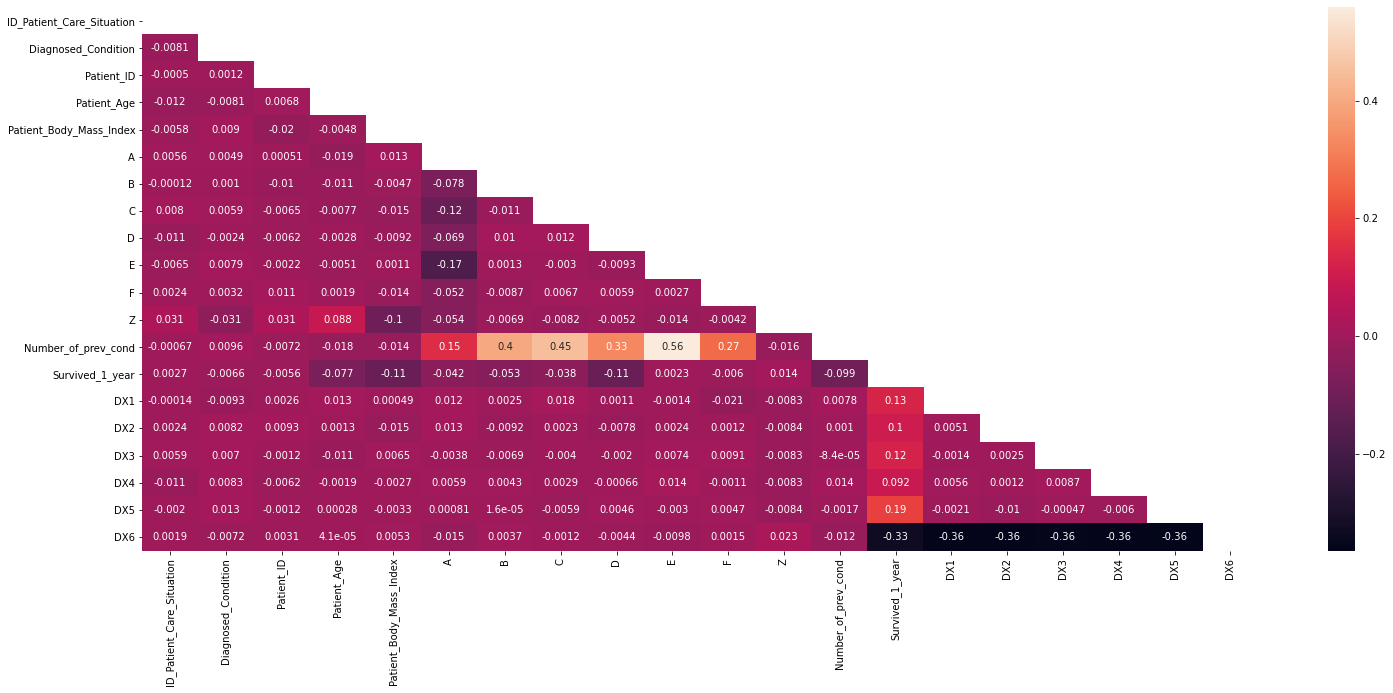

In [22]:
corr_matrix = pharma_data.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(25,10))
sns.heatmap(corr_matrix, mask=mask, annot=True, )
sns.set_style({'xtick.bottom':True}, {'ytick.left':True})

In [ ]:
sns.pairplot(pharma_data)

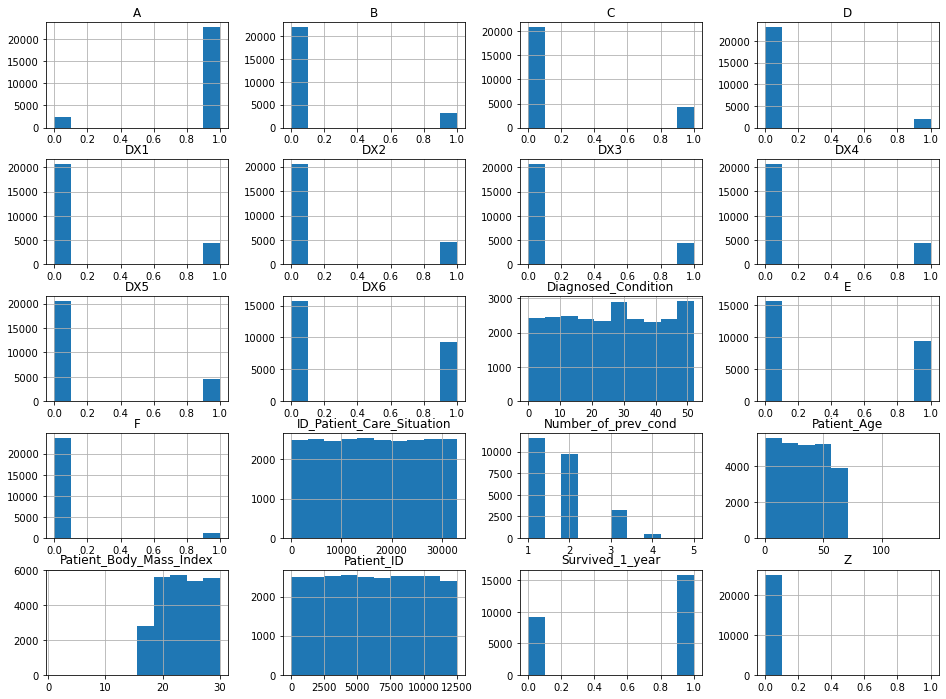

In [22]:
pharma_data.hist(bins=10, figsize=(16,12))
plt.show()

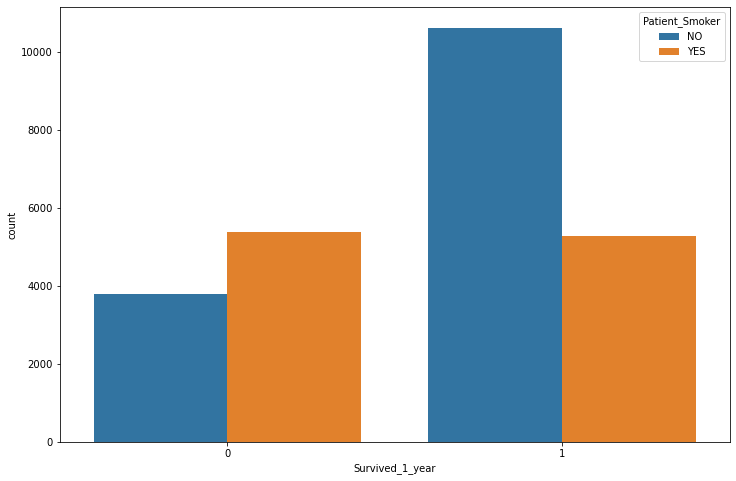

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(pharma_data['Survived_1_year'], hue=pharma_data['Patient_Smoker'])
plt.show()

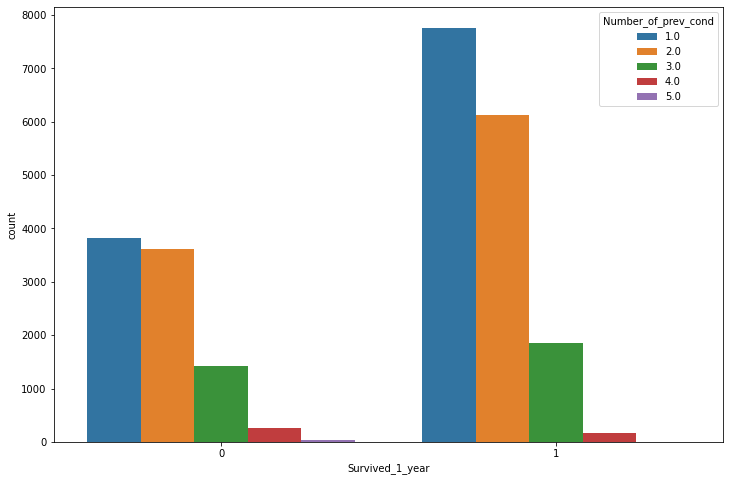

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(pharma_data['Survived_1_year'], hue=pharma_data['Number_of_prev_cond'])
plt.show()

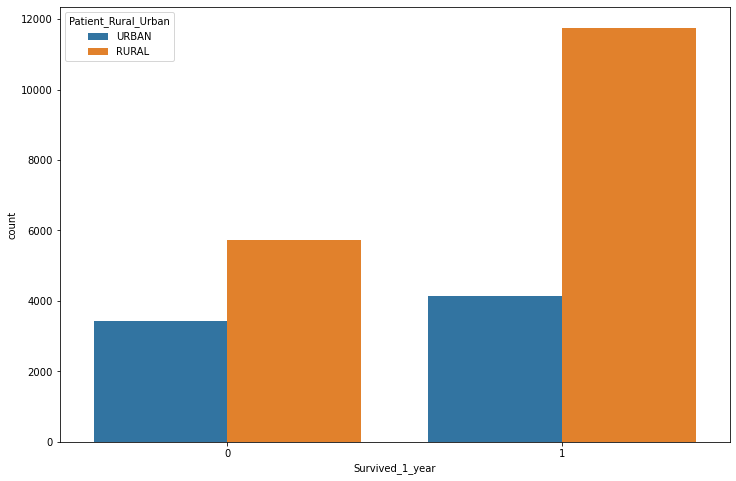

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(pharma_data['Survived_1_year'], hue=pharma_data['Patient_Rural_Urban'])
plt.show()

## Data Pre-processing

### Dropping irrelevant columns
##### Patient_Smoker column contains only one classification: 'Stable'.Therefore dropping it will have no effect on the model

In [26]:
pharma_data = pharma_data.drop(columns=['Treated_with_drugs', 'Patient_mental_condition'])

### Encoding categorical variables

In [27]:
pharma_data = pd.get_dummies(pharma_data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

### Splitting data into input and target variables

In [28]:
X = pharma_data.drop(columns=['Survived_1_year'])
y = pharma_data['Survived_1_year']

### Scaling/Standardizing the data

In [29]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns
scaled_features

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,-0.032393,1.365690,0.609236,1.374180,-0.472224,0.333636,-0.384285,-0.458159,-0.293258,1.291503,...,-0.464198,2.117014,-0.462738,-0.467114,-0.470531,-0.771856,0.860458,-0.860458,-1.516961,1.516961
1,-0.743326,-1.548861,-0.906333,-1.599076,1.432420,0.333636,-0.384285,2.182650,-0.293258,1.291503,...,-0.464198,-0.472363,-0.462738,-0.467114,-0.470531,1.295578,0.860458,-0.860458,0.659213,-0.659213
2,-0.031974,-1.283901,0.657803,-0.676342,0.725043,0.333636,-0.384285,-0.458159,-0.293258,1.291503,...,-0.464198,-0.472363,-0.462738,-0.467114,-0.470531,1.295578,0.860458,-0.860458,0.659213,-0.659213
3,-1.145873,0.305854,1.064656,-1.291498,-0.211975,0.333636,-0.384285,-0.458159,-0.293258,1.291503,...,-0.464198,-0.472363,-0.462738,-0.467114,-0.470531,1.295578,0.860458,-0.860458,0.659213,-0.659213
4,0.458234,1.100731,0.339759,1.015339,-0.559393,0.333636,-0.384285,-0.458159,-0.293258,-0.774292,...,2.154252,-0.472363,-0.462738,-0.467114,-0.470531,-0.771856,0.860458,-0.860458,0.659213,-0.659213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,-1.392183,-1.615100,-1.039823,-0.009922,-0.691932,0.333636,-0.384285,2.182650,-0.293258,1.291503,...,-0.464198,-0.472363,2.161049,2.140803,-0.470531,-0.771856,0.860458,-0.860458,0.659213,-0.659213
25075,1.560704,-0.356544,-0.952402,1.374180,-0.201161,0.333636,-0.384285,2.182650,-0.293258,-0.774292,...,-0.464198,2.117014,-0.462738,-0.467114,-0.470531,-0.771856,-1.162171,1.162171,0.659213,-0.659213
25076,1.237849,-0.555264,1.525072,0.912813,-0.923032,-2.997278,-0.384285,2.182650,-0.293258,-0.774292,...,-0.464198,-0.472363,-0.462738,2.140803,2.125257,-0.771856,-1.162171,1.162171,0.659213,-0.659213
25077,-1.590887,-1.482621,0.649200,-0.625078,-0.730038,0.333636,-0.384285,-0.458159,-0.293258,-0.774292,...,-0.464198,-0.472363,-0.462738,-0.467114,2.125257,-0.771856,0.860458,-0.860458,-1.516961,1.516961


### Splittting into train and test sets

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Buiding a GradientBoostingClassifier model

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt= GradientBoostingClassifier(n_estimators=600)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=600)

### Obtaining f1_score

In [48]:
from sklearn.metrics import f1_score
y_pred = gbrt.predict(X_test)
f1_score(y_test, y_pred)

0.8827557584561113

## Introducing and pre-processing the new test file

In [35]:
test_new = pd.read_csv('Testing_set_advc.csv')

In [36]:
test_new

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,24206,35,4640,DX5,65,20.710365,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,32827,30,3214,dx1,2,24.250219,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,3694,46,3564,dx6,1,27.139276,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7164,44,5176,DX1,29,29.191759,NO,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,1259,30,1101,DX5,51,20.844146,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,1340,30,8689,DX6,44,20.129337,NO,RURAL,Stable,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9326,2453,32,10715,DX6,15,20.155865,YES,RURAL,Stable,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9327,22794,42,3762,DX6,12,29.570005,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9328,2493,35,4606,DX6,22,17.701751,YES,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [37]:
test_new['Treated_with_drugs'] = test_new['Treated_with_drugs'].str.upper().str.strip()
test_new['Treated_with_drugs'].unique()

array(['DX5', 'DX1', 'DX6', 'DX3', 'DX2 DX3', 'DX4', 'DX2', 'DX3 DX5',
       'DX1 DX4', 'DX1 DX2', 'DX1 DX3 DX4 DX5', 'DX1 DX3 DX4', 'DX2 DX5',
       'DX4 DX5', 'DX3 DX4', 'DX2 DX3 DX4', 'DX1 DX3', 'DX2 DX4',
       'DX1 DX3 DX5', 'DX1 DX5', 'DX1 DX2 DX4', 'DX2 DX4 DX5',
       'DX3 DX4 DX5', 'DX1 DX2 DX5', 'DX2 DX3 DX5', 'DX1 DX2 DX3',
       'DX1 DX2 DX4 DX5', 'DX1 DX2 DX3 DX4 DX5', 'DX1 DX2 DX3 DX4',
       'DX1 DX4 DX5', 'DX2 DX3 DX4 DX5', 'DX1 DX2 DX3 DX5'], dtype=object)

In [38]:
test_new['Patient_Smoker'] = test_new['Patient_Smoker'].str.upper().str.strip()

In [39]:
test_new['Patient_Smoker'] = test_new['Patient_Smoker'].replace('YESS','YES')
test_new['Patient_Smoker'] = test_new['Patient_Smoker'].replace('CANNOT SAY','NO')

In [40]:
test_new['Patient_Smoker'].value_counts()

NO     5373
YES    3957
Name: Patient_Smoker, dtype: int64

In [41]:
test_new_slice = test_new['Treated_with_drugs'].str.get_dummies(sep='')

In [42]:
test_new['DX1'] = test_new_slice['1']
test_new['DX2'] = test_new_slice['2']
test_new['DX3'] = test_new_slice['3']
test_new['DX4'] = test_new_slice['4']
test_new['DX5'] = test_new_slice['5']
test_new['DX6'] = test_new_slice['6']

In [43]:
test_new = test_new.drop(columns=['Treated_with_drugs', 'Patient_mental_condition'])

In [44]:
test_new = pd.get_dummies(test_new, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

### Predicting on the new test data

In [45]:
test_new_predictions = gbrt.predict(test_new)

### Creating prediction file

In [46]:
res = pd.DataFrame(test_new_predictions)
res.index = test_new.index
res.columns = ["test_new_predictions"]
res.to_csv("Fortune_prediction_results.csv")

### Thank you DPhi :)